# TOC
1. 

## Question 1
A company needs to architect a hybrid DNS solution. This solution will use an Amazon Route 53 private hosted zone for the domain cloud.example.com for the resources stored within VPCs.

The company has the following DNS resolution requirements:
- On-premises systems should be able to resolve and connect to cloud.example.com.
- All VPCs should be able to resolve cloud.example.com.
- There is already an AWS Direct Connect connection between the on-premises corporate network and AWS Transit Gateway.

Which architecture should the company use to meet these requirements with the HIGHEST performance?

A. Associate the private hosted zone to all the VPCs. Create a Route 53 inbound resolver in the shared services VPC. Attach all VPCs to the transit gateway and create forwarding rules in the on-premises DNS server for cloud.example.com that point to the inbound resolver.

B. Associate the private hosted zone to all the VPCs. Deploy an Amazon EC2 conditional forwarder in the shared services VPC. Attach all VPCs to the transit gateway and create forwarding rules in the on-premises DNS server for cloud.example.com that point to the conditional forwarder.

C. Associate the private hosted zone to the shared services VPC. Create a Route 53 outbound resolver in the shared services VPC. Attach all VPCs to the transit gateway and create forwarding rules in the on-premises DNS server for cloud.example.com that point to the outbound resolver.

D. Associate the private hosted zone to the shared services VPC. Create a Route 53 inbound resolver in the shared services VPC. Attach the shared services VPC to the transit gateway and create forwarding rules in the on-premises DNS server for cloud.example.com that point to the inbound resolver.

#### Unknown terms
- **Route53 inbound/outbound resolver** \
    Route53 resolver helps resolve DNS queries between on-prem and AWS resources \
    Inbound resolver Endpoints allow DNS queries from to reach on-prem DNS servers from your VPC \
    Outbound resolver Endpoints are vice versa \
    https://docs.aws.amazon.com/Route53/latest/DeveloperGuide/resolver.html
- **shared services VPC** \
    Centralize shared services into a VPC \
    https://docs.aws.amazon.com/vpc/latest/userguide/vpc-sharing.html
    
- **EC2 conditional forwarder** do not exists \
    conditional forwarder: https://www.linkedin.com/pulse/understanding-essential-dns-settings-forwarders-prabu-ponnan/ \
    https://docs.aws.amazon.com/whitepapers/latest/hybrid-cloud-dns-options-for-vpc/decentralized-conditional-forwarders.html

**Answer: A**

Reference: [Hybrid DNS resolution with Amazon Route 53 Resolver Endpoints](https://d1.awsstatic.com/architecture-diagrams/ArchitectureDiagrams/hybrid-dns_route53-resolver-endpoint-ra.pdf)

Explaination:

- B: No such services Amazon EC2 conditional forwarder
- C: For on-prem to resolve private domain in AWS must point to inbound resolver
- D: If only attach transit gateway, after resolving domain name AWS resources can not reach on-prem or vice versa


In [2]:
%%bash
echo "hello bash shell"
ls -al /

hello bash shell
total 76
drwxr-xr-x   1 root root 4096 Oct 13 04:28 .
drwxr-xr-x   1 root root 4096 Oct 13 04:28 ..
lrwxrwxrwx   1 root root    7 Aug 16 02:02 bin -> usr/bin
drwxr-xr-x   2 root root 4096 Apr 18  2022 boot
drwxr-xr-x   5 root root  340 Oct 13 04:28 dev
-rwxr-xr-x   1 root root    0 Oct 13 04:28 .dockerenv
drwxr-xr-x   1 root root 4096 Oct 13 04:28 etc
drwxr-xr-x   1 root root 4096 Sep 25 03:03 home
lrwxrwxrwx   1 root root    7 Aug 16 02:02 lib -> usr/lib
lrwxrwxrwx   1 root root    9 Aug 16 02:02 lib32 -> usr/lib32
lrwxrwxrwx   1 root root    9 Aug 16 02:02 lib64 -> usr/lib64
lrwxrwxrwx   1 root root   10 Aug 16 02:02 libx32 -> usr/libx32
drwxr-xr-x   2 root root 4096 Aug 16 02:03 media
drwxr-xr-x   2 root root 4096 Aug 16 02:03 mnt
drwxr-xr-x   1 root root 4096 Sep 25 03:12 opt
dr-xr-xr-x 288 root root    0 Oct 13 04:28 proc
drwx------   2 root root 4096 Aug 16 02:06 root
drwxr-xr-x   5 root root 4096 Aug 16 02:06 run
lrwxrwxrwx   1 root root    8 Aug 16 02:02 sbin -

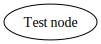

In [1]:
from graphviz import Graph
g = Graph()
g.node('Test node')
g

## Question 2
A company is providing weather data over a REST-based API to several customers. The API is hosted by Amazon API Gateway and is integrated with different AWS Lambda functions for each API operation. The company uses Amazon Route 53 for DNS and has created a resource record of weather.example.com. The company stores data for the API in Amazon DynamoDB tables. The company needs a solution that will give the API the ability to fail over to a different AWS Region.
Which solution will meet these requirements?

A. Deploy a new set of Lambda functions in a new Region. Update the API Gateway API to use an edge-optimized API endpoint with Lambda functions from both Regions as targets. Convert the DynamoDB tables to global tables.

B. Deploy a new API Gateway API and Lambda functions in another Region. Change the Route 53 DNS record to a multivalue answer. Add both API Gateway APIs to the answer. Enable target health monitoring. Convert the DynamoDB tables to global tables.

C. Deploy a new API Gateway API and Lambda functions in another Region. Change the Route 53 DNS record to a failover record. Enable target health monitoring. Convert the DynamoDB tables to global tables.

D. Deploy a new API Gateway API in a new Region. Change the Lambda functions to global functions. Change the Route 53 DNS record to a multivalue answer. Add both API Gateway APIs to the answer. Enable target health monitoring. Convert the DynamoDB tables to global tables.

**Answer: B**

Explaination:
- A and D : API Gateway and Lambda are regional services. \
  Reference: [Implementing Multi-Region Disaster Recovery Using Event-Driven Architecture](https://aws.amazon.com/blogs/architecture/implementing-multi-region-disaster-recovery-using-event-driven-architecture/)

- C: It sticks to a failover record while we want to be flexible like the multivalue answer record. \
  Reference: [Multivalue answer routing](https://docs.aws.amazon.com/Route53/latest/DeveloperGuide/routing-policy-multivalue.html)